In [1]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])


sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random

In [2]:

def Voisinnage(solution):
    voisin = solution.copy()
    i = random.randint(0, len(solution) - 1)  # Sélection d'un élément au hasard
    j = random.randint(0, len(solution) - 1)  # Sélection d'un autre élément au hasard
    voisin[i], voisin[j] = voisin[j], voisin[i]  # Échange des deux éléments
    return voisin



def recuit_simule(initial_state,  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99):
    """
    Implémente l'algorithme de recuit simulé pour résoudre le problème de VRP.
    """
    
    current_state = initial_state
    current_energy = cout(get_route_version2(current_state,time_window,Q))
    best_state = current_state
    best_energy = current_energy
    temperature = temperature_initiale
    i=0
    history_sol=[]
    history = []
    while temperature > temperature_finale:
        # Générer une nouvelle solution voisine
        new_state =  Voisinnage(current_state.copy())
        new_energy = cout(get_route_version2(new_state,time_window,Q))
        delta_energy = new_energy - current_energy
        if i==0:
            # Calculer le paramètre beta pour la loi de Boltzmann
            beta = abs(1/ (5 * math.log(0.66)))
            i=1

        # Accepter ou non la nouvelle solution
        if delta_energy < 0 or math.exp(-1 / (beta*temperature)) >random.random():
            current_state = new_state
            current_energy = new_energy

        # Mettre à jour la meilleure solution trouvée jusqu'à présent
         
        best_state = current_state
        best_energy = current_energy

        temperature *= alpha
        history.append(best_energy)
        history_sol.append(best_state)

    # Retourner la meilleure solution trouvée
    indice = history.index(min(history))
    return history_sol[indice] , history[indice],history
     

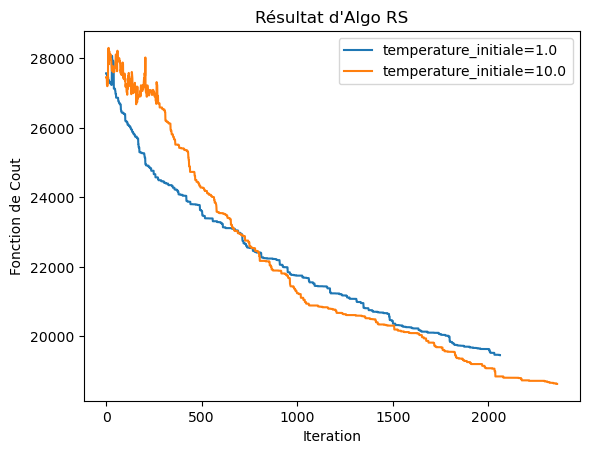

In [3]:
list_client_initial = [i for i in range(nombre_client)]
random.shuffle(list_client_initial)
best_state, best_energy , history_t_1 = recuit_simule(list_client_initial,  temperature_initiale=1.0, temperature_finale=1e-9, alpha=0.99)
best_state, best_energy , history_t_10 = recuit_simule(list_client_initial,  temperature_initiale=20.0, temperature_finale=1e-9, alpha=0.99)

plt.plot(history_t_1, label = 'temperature_initiale=1.0')
plt.plot(history_t_10, label = 'temperature_initiale=10.0')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo RS")
plt.savefig('Résultats/Algo_RS_comparaison_temperature_initiale')

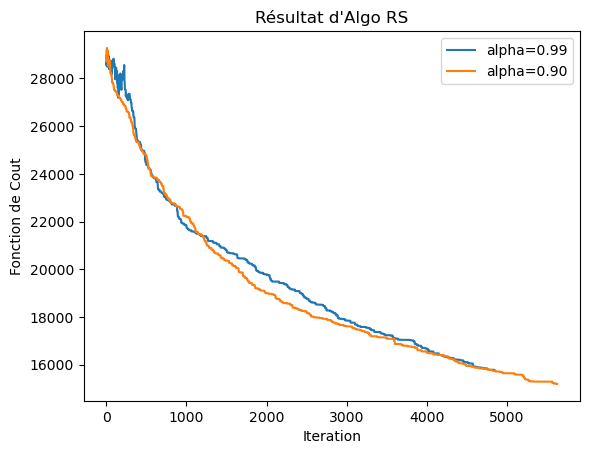

In [4]:
list_client_initial = [i for i in range(nombre_client)]
random.shuffle(list_client_initial)
best_state, best_energy , history_alpha_99 = recuit_simule(list_client_initial,  temperature_initiale=15.0, temperature_finale=1e-20, alpha=0.99)
best_state, best_energy , history_alpha_90 = recuit_simule(list_client_initial,  temperature_initiale=15.0, temperature_finale=1e-150, alpha=0.94)
plt.plot(history_alpha_99, label = 'alpha=0.99')
plt.plot(history_alpha_90, label = 'alpha=0.90')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo RS")
plt.savefig('Résultats/Algo_RS_comparaison_alpha')